<a href="https://colab.research.google.com/github/stevearonson/VB-Video-Tracking/blob/master/Detectron2_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

     |████████████████████████████████| 276kB 5.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44075 sha256=f9fd9a0766f99fa95a55449a97c7ccb7b1cc85f7227bafc41c12d38d9466125a
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.8MB 786kB/s 
     |████████████████████████████████| 2.2MB 5.3MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210203-cp36-none-any.whl size=44911 sha256=eee38110bdf9d1eca6a296228d7c83cec81cdfb210b89c19311c81c51debe1bf
  Stored in directory: /root/.cache/pip/wheels/6b/c0/3b/5fa606f5e47541337df17c1d11845afc357c740039cabdef40
  Created wheel for iopath: filename=iopath-0.1.3-cp36-none-any.whl size=11169 sha256=e6ed11a579bc575bcdeec49474d75c3b81250cf7f542cfc2a9eec1a468e18372
  Stored in directory: /root/.cache/pip/wheels/a9/1d/55/94a55e032409ac7617f9cbb88a0fa2cf4e7208806c29730804
Successfully built fvcore iopath
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0

In [12]:
!apt install python3-opencv  # the one pre-installed have some issues

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python3-opencv
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 534 kB of archives.
After this operation, 2,941 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python3-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [534 kB]
Fetched 534 kB in 2s (286 kB/s)
Selecting previously unselected package python3-opencv.
(Reading database ... 146456 files and directories currently installed.)
Preparing to unpack .../python3-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...
Setting up python3-opencv (3.2.0+dfsg-4ubuntu0.1) ...


In [1]:
!git clone https://github.com/facebookresearch/detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 10075 (delta 0), reused 1 (delta 0), pack-reused 10070
Receiving objects: 100% (10075/10075), 4.16 MiB | 3.27 MiB/s, done.
Resolving deltas: 100% (7296/7296), done.


In [31]:
!ls detectron2/configs/COCO-Keypoints/

Base-Keypoint-RCNN-FPN.yaml	 keypoint_rcnn_R_50_FPN_3x.yaml
keypoint_rcnn_R_101_FPN_3x.yaml  keypoint_rcnn_X_101_32x8d_FPN_3x.yaml
keypoint_rcnn_R_50_FPN_1x.yaml


In [14]:
# !wget --no-check-certificate --content-disposition https://github.com/stevearonson/VB-Video-Tracking/blob/master/input.jpg

--2021-02-03 16:01:48--  https://github.com/stevearonson/VB-Video-Tracking/blob/master/input.jpg
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘input.jpg.1’

input.jpg.1             [ <=>                ]  90.58K  --.-KB/s    in 0.08s   

2021-02-03 16:01:49 (1.11 MB/s) - ‘input.jpg.1’ saved [92755]



In [20]:
from google.colab import files
uploaded = files.upload()

Saving input.jpg to input.jpg


In [34]:
!ls -ls

total 1044
  4 drwxr-xr-x 15 root root   4096 Feb  3 15:57 detectron2
 88 -rw-r--r--  1 root root  89301 Feb  3 16:03 input.jpg
312 -rw-r--r--  1 root root 315553 Feb  3 16:06 InstanceSegmentation.jpg
324 -rw-r--r--  1 root root 329601 Feb  3 16:15 Keypoints.jpg
  4 drwxr-xr-x  1 root root   4096 Feb  1 17:27 sample_data
312 -rw-r--r--  1 root root 315516 Feb  3 16:05 test.jpg


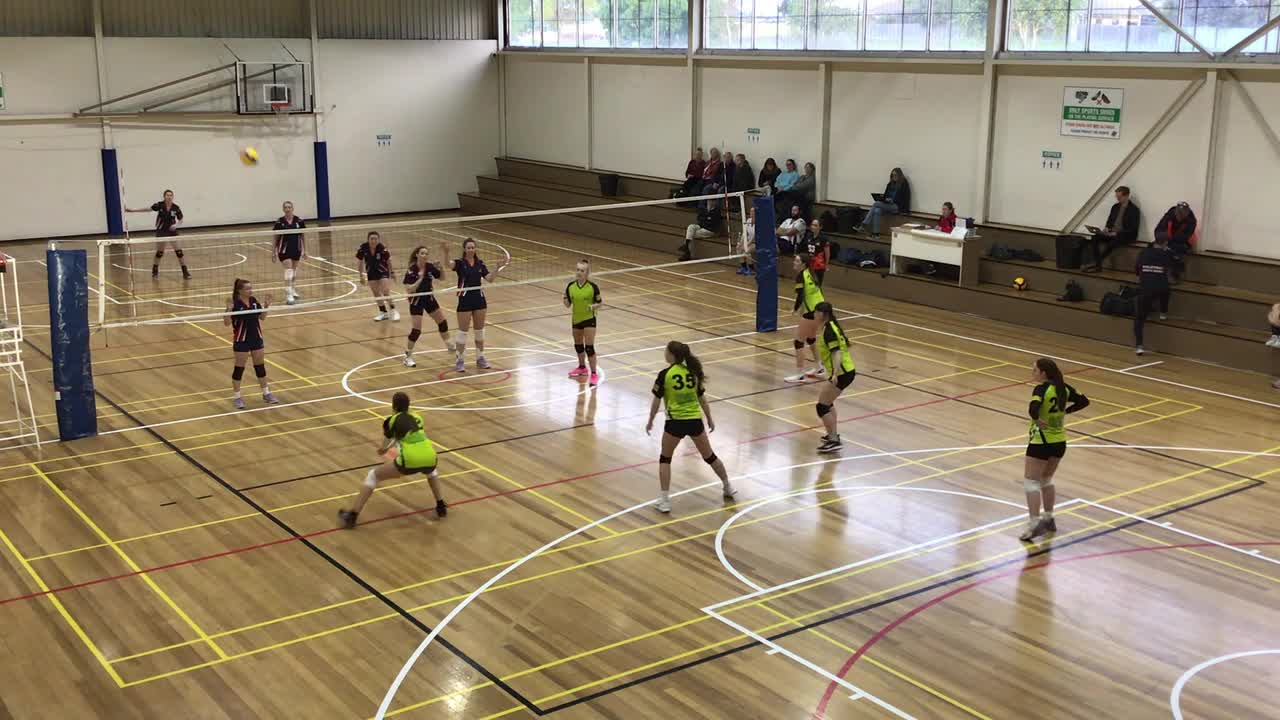

In [22]:
import os, json, cv2
from google.colab.patches import cv2_imshow
im = cv2.imread("input.jpg")
cv2_imshow(im)

In [26]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml \
    --input input.jpg \
    --output InstanceSegmentation.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl \

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/03 16:05:55 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml', input=['input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl'], output='InstanceSegmentation.jpg', video_input=None, webcam=False)
[02/03 16:05:59 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl
[02/03 16:05:59 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/d

In [27]:
!ls -ls

total 720
  4 drwxr-xr-x 15 root root   4096 Feb  3 15:57 detectron2
 88 -rw-r--r--  1 root root  89301 Feb  3 16:03 input.jpg
312 -rw-r--r--  1 root root 315553 Feb  3 16:06 InstanceSegmentation.jpg
  4 drwxr-xr-x  1 root root   4096 Feb  1 17:27 sample_data
312 -rw-r--r--  1 root root 315516 Feb  3 16:05 test.jpg


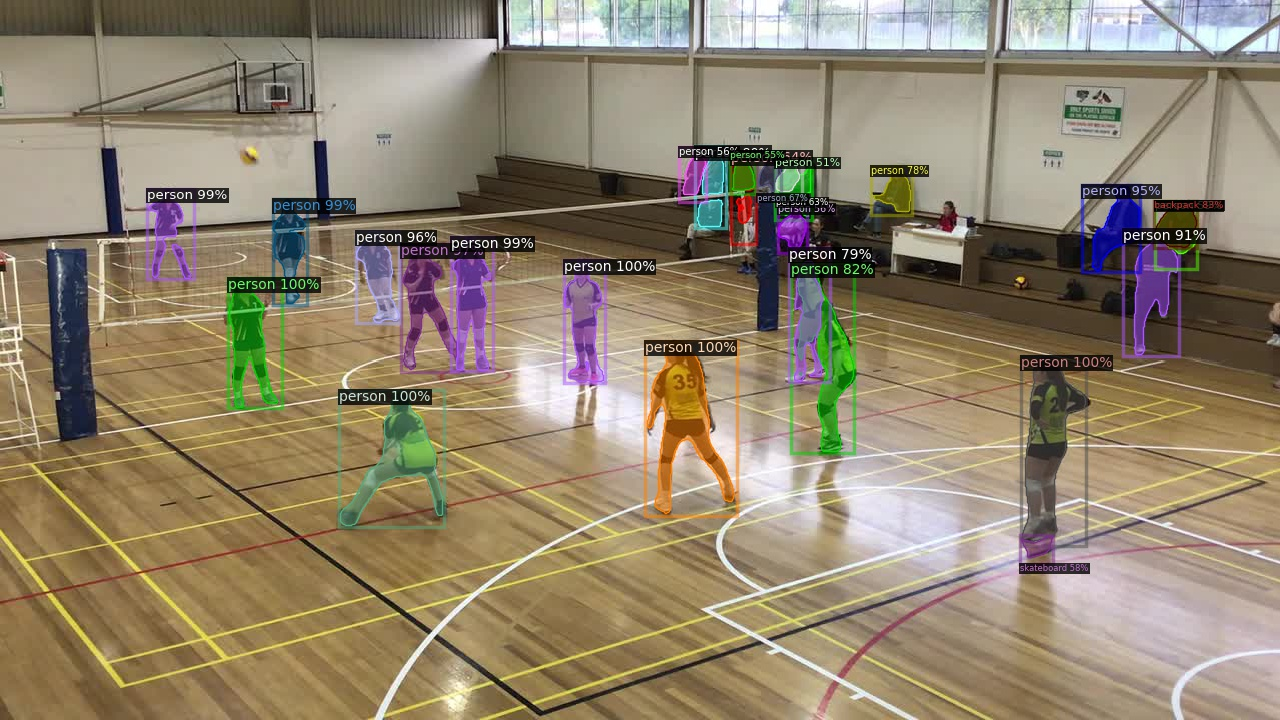

In [28]:
im = cv2.imread("InstanceSegmentation.jpg")
cv2_imshow(im)

In [32]:
!python detectron2/demo/demo.py \
    --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml \
    --input input.jpg \
    --output Keypoints.jpg \
    --opts MODEL.WEIGHTS detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl \

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[02/03 16:14:37 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml', input=['input.jpg'], opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl'], output='Keypoints.jpg', video_input=None, webcam=False)
[02/03 16:14:41 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl
model_final_a6e10b.pkl: 237MB [00:18, 12.8MB/s]               
[02/03 16:15:00 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/1 [00:00<?, ?it/s]/usr/loca

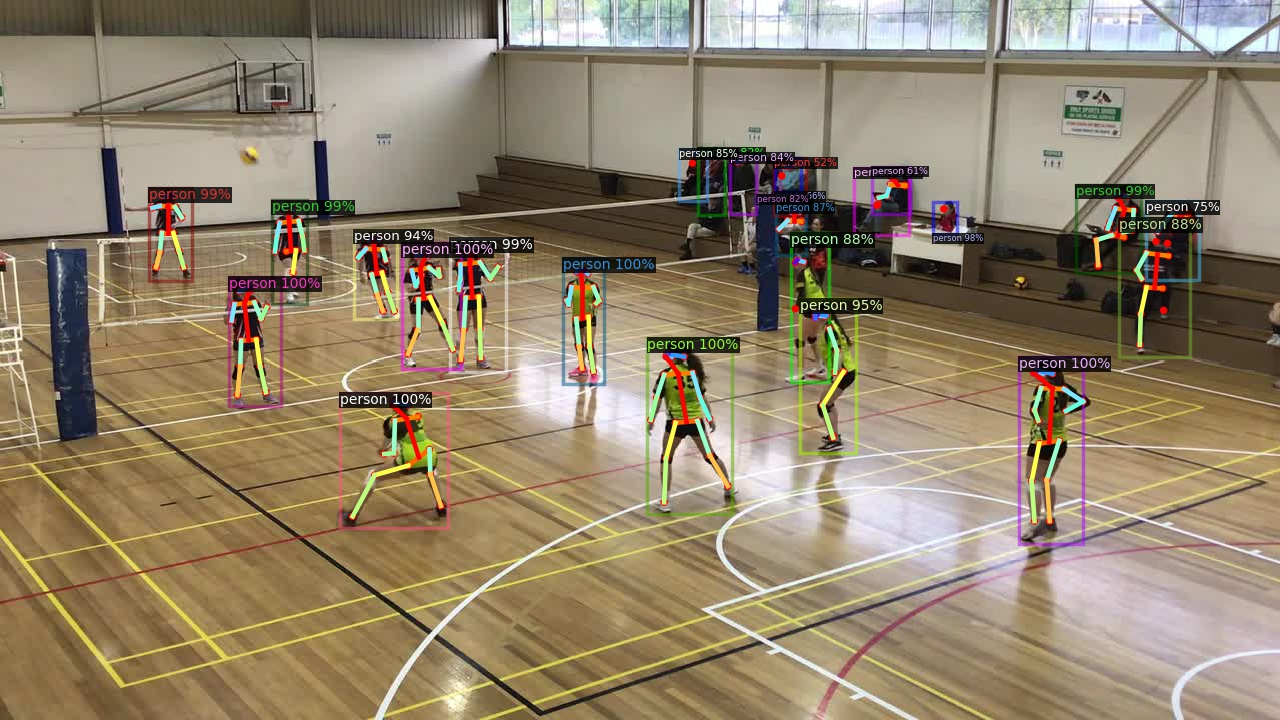

In [33]:
im = cv2.imread("Keypoints.jpg")
cv2_imshow(im)